## Importing the Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

#connecting to tableau
#import gspread
#from oauth2client.service_account import ServiceAccountCredentials
#from df2gspread import df2gspread as d2g

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
#Getting the IPL ball-by-ball dataset as IPL_df
IPL_df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [5]:
IPL_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
IPL_df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208036,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,VR Iyer,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,12.6,Chennai Super Kings,Kolkata Knight Riders,RV Uthappa,F du Plessis,CV Varun,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
IPL_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
IPL_df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [9]:
# Removing 3,4,5,6 innings as they are Super Overs
IPL_df= IPL_df[(IPL_df.innings == 1) | (IPL_df.innings == 2)]

In [10]:
IPL_df.innings.unique()

array([2, 1], dtype=int64)

In [11]:
# converting start_date to datetime
IPL_df['start_date'] = pd.to_datetime(IPL_df['start_date']) 

In [12]:
# checking for errors in data
IPL_df.runs_off_bat.unique()

array([4, 1, 2, 0, 6, 5, 3], dtype=int64)

In [13]:
IPL_df.innings.unique()

array([2, 1], dtype=int64)

In [14]:
IPL_df.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021], dtype=int64)

In [15]:
IPL_df.ball.unique() #since extras - the other ball numbers - consider from 0.1 - 19.9

array([ 6.8,  2.7,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  4.1,  4.2,  4.3,
        4.4,  2.6,  4.5,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,
        6.3,  6.4,  6.5,  4.6,  6.6,  2.5,  2.2, 18.3, 18.4, 18.5, 18.6,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6,  0.1,  2.4,  0.2,  0.4,  0.5,
        0.6,  0.7,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  2.1,  0.3,  6.7,
        7.1,  7.2, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7,
       13.1, 13.2, 11.4, 13.3, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4, 14.5,
       14.6, 14.7, 15.1, 15.2, 13.4, 11.3, 11.2, 11.1,  7.3,  7.4,  7.5,
        7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6,  9.7, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6,
       18.2, 18.1,  2.3, 17.5, 17.6,  3.7, 17.4, 15.3, 15.4, 15.6, 16.1,
       16.2, 16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 15.5,  7.7,  5.7,
        1.7, 12.8, 13.7,  5.8, 16.7, 15.7,  1.8, 11.9, 11.8, 11.7,  4.7,
       13.8,  3.8, 19.7, 17.7,  0.8, 10.7, 10.8, 10

## Getting MS Dhoni's Dataset

In [16]:
IPL_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [17]:
IPL_df[IPL_df.batting_team == 'Chennai Super Kings']['striker'].unique

<bound method Series.unique of 461       MEK Hussey     
462       JDP Oram       
463       JDP Oram       
464       MEK Hussey     
465       JDP Oram       
466       JDP Oram       
467       JDP Oram       
468       MEK Hussey     
469       SK Raina       
470       SK Raina       
471       MEK Hussey     
472       SK Raina       
473       SK Raina       
474       MEK Hussey     
475       MEK Hussey     
476       MEK Hussey     
477       SK Raina       
478       SK Raina       
479       SK Raina       
480       SK Raina       
481       MEK Hussey     
482       MEK Hussey     
483       MEK Hussey     
484       MEK Hussey     
485       MEK Hussey     
486       MEK Hussey     
487       JDP Oram       
488       MEK Hussey     
489       MEK Hussey     
490       S Badrinath    
491       S Badrinath    
492       MEK Hussey     
493       MEK Hussey     
494       MEK Hussey     
495       S Badrinath    
496       S Badrinath    
497       S Badrinath    
498    

In [18]:
MSD_df = IPL_df[IPL_df.batting_team == 'Chennai Super Kings'][IPL_df.striker =='MS Dhoni'] #Mistake : NO RPSG data

In [19]:
MSD_df = IPL_df[IPL_df.striker == 'MS Dhoni']

In [20]:
MSD_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
560,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,16.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,19.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,JDP Oram,MA Khote,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN


In [21]:
MSD_df.batting_team.unique() #all set

array(['Chennai Super Kings', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

# General Stats of MS Dhoni in all IPL seasons (2008-2021)

In [22]:
# Matches = count[(match_id).unique] lolol refer below for correct code
# Average = Runs per Innings => sum(runs_off_bat)/no.of outs
# Strike-Rate = 100* (sum(runs))/count(ball)

### MS Dhoni's Total Number of Innings in IPL

In [23]:
MSD_df.match_id.unique()

array([ 335983,  335989,  335993,  335996,  336001,  336005,  336007,
        336009,  336013,  336018,  336029,  336033,  336037,  336040,
        392181,  392185,  392189,  392196,  392202,  392206,  392209,
        392214,  392224,  392227,  392231,  392234,  392238,  419110,
        419113,  419129,  419133,  419137,  419142,  419147,  419155,
        419159,  419163,  419165,  501198,  501206,  501211,  501215,
        501221,  501226,  501236,  501249,  501253,  501261,  501266,
        501268,  501271,  548306,  548311,  548316,  548318,  548322,
        548330,  548332,  548343,  548347,  548352,  548355,  548361,
        548368,  548371,  548379,  548380,  548381,  598002,  598012,
        598015,  598020,  598022,  598026,  598030,  598034,  598038,
        598041,  598046,  598051,  598058,  598062,  598068,  598073,
        729283,  729293,  729297,  729303,  729311,  733971,  733981,
        733987,  733995,  734003,  734013,  734023,  734029,  734035,
        734047,  829

In [24]:
Total_matches = len(pd.unique(MSD_df.match_id))

In [25]:
Total_matches ##wrong - yes, correct - innings

193

In [26]:
Innings = MSD_df.match_id.nunique()

In [27]:
Innings # verified

193

# MSD's Runs in IPL

In [28]:
Runs = MSD_df.runs_off_bat.sum()

In [29]:
Runs # verified

4746

# MSD's Average and SR


In [30]:
# Average = Total no of runs/ (No. of innings - No. of notout) or (Total no. of outs)

In [31]:
# Average = MSD_df.runs_off_bat.sum() / (MSD_df.match_id.nunique() - #this dataset is not having enough data (should have not out/out column or dataset should be innings wise instead of ball-by-ball )

In [32]:
#total number of outs
# MSD_outs = IPL_df[(IPL_df[striker['player_dismissed'] == 'MS Dhoni') | (MSD_df.non_striker['player_dismissed']=='MS Dhoni')]
MSD_outs = IPL_df[(IPL_df.striker == 'MS Dhoni')|(IPL_df.non_striker == 'MS Dhoni')] [IPL_df.player_dismissed == 'MS Dhoni']

In [33]:
len(MSD_outs)

120

# Average

In [34]:
MSD_Average = MSD_df.runs_off_bat.sum()/len(MSD_outs)

In [35]:
MSD_Average

39.55

In [36]:
# Strike-rate = 100 * Total no. of runs/ Balls faced

In [37]:
MSD_df.runs_off_bat.sum() / MSD_df.ball.count()

1.3168701442841289

In [38]:
Strike_rate = 100* MSD_df.runs_off_bat.sum() / MSD_df.ball.count()

In [39]:
Strike_rate

131.68701442841288

In [40]:
MSD_df.ball.count() # balls faced - has balls which had extras also - how to delete?

3604

In [41]:
MSD_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN


In [42]:
# MSD_df_withoutextras = MSD_df[(MSD_df.extras == 0) & (MSD_df.player_dismissed == 'MS Dhoni')]
# MSD_df_withoutextras = MSD_df[(MSD_df.extras == 0) & (MSD_df.player_dismissed == 'true')]
# MSD_df_withoutextras = MSD_df[(MSD_df.extras != 1) & (MSD_df.extras != 2) & (MSD_df.extras != 3) & (MSD_df.extras != 4) & (MSD_df.extras != 5)]
# MSD_df_withoutextras = MSD_df[] - all the rough work lolol

In [43]:
MSD_df.penalty.unique()

array([nan])

In [44]:
# we can consider balls faced by batsman when
#  extras=0, wides != nan, noballs = all, byes = all, legbyes = all, penalty= column has nothing

In [45]:
#MSD_df_withoutextras = MSD_df[MSD_df['wides'] != 'nan']

In [46]:
MSD_df_woextras = MSD_df[~MSD_df['wides'].notna()]

In [47]:
MSD_df_woextras.wides.unique()

array([nan])

In [48]:
MSD_df_woextras.ball.count() #wohooooooooooo verified cricinfo

3494

In [49]:
MSD_df.wicket_type.unique()

array(['lbw', nan, 'caught', 'run out', 'bowled', 'caught and bowled',
       'stumped'], dtype=object)

In [50]:
runouts = MSD_df[MSD_df.wicket_type == 'run out']

In [51]:
runouts.head(1) # all runouts extra is 0, so we can consider all batsmen who are dismissed and strike is MSD

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
1840,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,18.7,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,A Nehra,0,0,NaN,NaN,NaN,NaN,NaN,run out,ML Hayden,NaN,NaN


In [52]:
IPL_df[IPL_df.wicket_type == 'run out'][IPL_df.non_striker == 'MS Dhoni'] [IPL_df.player_dismissed == 'MS Dhoni']  # 3 scenarios where MSD is non-striker and runout - no extras here as well

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
58789,548306,2012,2012-04-04,"MA Chidambaram Stadium, Chepauk",1,15.1,Chennai Super Kings,Mumbai Indians,S Badrinath,MS Dhoni,PP Ojha,0,0,NaN,NaN,NaN,NaN,NaN,run out,MS Dhoni,NaN,NaN
82770,598022,2013,2013-04-20,Eden Gardens,2,11.3,Chennai Super Kings,Kolkata Knight Riders,MEK Hussey,MS Dhoni,JH Kallis,0,0,NaN,NaN,NaN,NaN,NaN,run out,MS Dhoni,NaN,NaN
178931,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,12.5,Chennai Super Kings,Mumbai Indians,SR Watson,MS Dhoni,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,run out,MS Dhoni,NaN,NaN


In [53]:
len(MSD_df)

3604

In [54]:
len(MSD_df_woextras)

3494

# Strike Rate


In [55]:
Strike_rate = 100* MSD_df.runs_off_bat.sum() / len(MSD_df_woextras)

In [56]:

Strike_rate #verified cricinfo

135.8328563251288

# Runs across each season
### ( 2020-21 are of much importance)

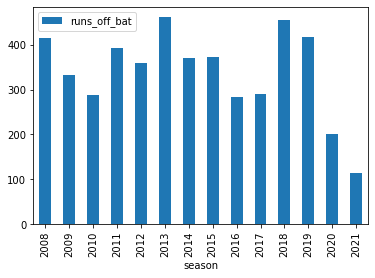

In [57]:
Season_runs = pd.DataFrame(MSD_df.groupby('season')['runs_off_bat'].sum()).plot(kind='bar') #.rename(columns = {'ball':'balls', 'striker':'playerName'})

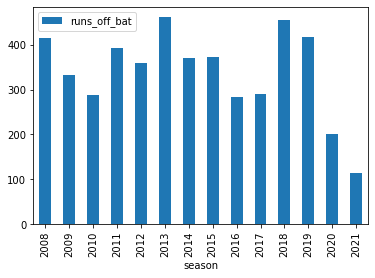

In [58]:
## giving numbers for each bar 
Season_runs = pd.DataFrame(MSD_df.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [78]:
MSD_runs

NameError: name 'MSD_runs' is not defined

In [ ]:
# plotting with various colours and increasing space

import random

In [79]:
MSD_df.groupby('season')['runs_off_bat'].sum()

season
2008    414
2009    332
2010    287
2011    392
2012    358
2013    461
2014    371
2015    372
2016    284
2017    290
2018    455
2019    416
2020    200
2021    114
Name: runs_off_bat, dtype: int64

In [80]:
#having names for each column

MSD_runs = pd.DataFrame(MSD_df.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs'}))


In [81]:
MSD_runs #wohooooooo

,Season,Runs
0,2008,414
1,2009,332
2,2010,287
3,2011,392
4,2012,358
5,2013,461
6,2014,371
7,2015,372
8,2016,284
9,2017,290


In [82]:
MSD_runs.Runs.sum()

4746

In [68]:
balls = pd.DataFrame(MSD_df_woextras.groupby('season')['ball'].count().reset_index().rename(columns = {'season':'Season', 'ball':'Balls'}))


#MSD_runs = pd.DataFrame(MSD_df.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs'}))


In [69]:
balls #balls faced in each season

,Season,Balls
0,2008,310
1,2009,261
2,2010,210
3,2011,247
4,2012,278
5,2013,283
6,2014,250
7,2015,305
8,2016,210
9,2017,250


In [70]:
balls.sum()

Season    28203
Balls     3494 
dtype: int64

In [ ]:
MSD_runs.merge(balls, on = 'Season', how = 'left')

In [ ]:
MSD_runs_balls = MSD_runs.merge(balls, on = 'Season', how = 'left')

In [ ]:
MSD_runs_balls

In [ ]:
MSD_runs_balls.plot(x="Season", y=["Balls","Runs"], kind="bar",figsize=(10,10),subplots='True',color = {"Balls":"Red","Runs":"Green"})
plt.show()

In [ ]:
#adding labels

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
  
    if __name__ == '__main__':
    
        # creating data on which bar chart will be plot
        x = [MSD_runs_balls.Season]
        y = [MSD_runs_balls.Runs]

        # setting figure size by using figure() function 
        plt.figure(figsize = (10,5))

        # making the bar chart on the data
        plt.bar(x, y)

        # calling the function to add value labels
        addlabels(x, y)

        # giving title to the plot
        plt.title("Runs in each season")

        # giving X and Y labels
        plt.xlabel("Season")
        plt.ylabel("Runs Scored")

        # visualizing the plot
        plt.show()




In [ ]:
MSD_SR= 100* MSD_runs_balls['Runs']/MSD_runs_balls['Balls']

In [ ]:
MSD_SR

In [ ]:
# having a name for SR column
MSD_SR = pd.DataFrame(MSD_SR).rename(columns = {0:'SR'})


In [ ]:
MSD_SR

In [ ]:
MSD_SR.to_csv('MSD_SR.csv')

In [ ]:
MSD_SR_eachseason = MSD_runs_balls.join(MSD_SR)

In [ ]:
MSD_SR_eachseason

In [ ]:
MSD_df.head(1)

# Strike rate across each season

In [ ]:
MSD_SR_eachseason

##sns.pairplot(MSD_runs_balls) #jus a randon try


In [ ]:
MSD_SR_eachseason.to_csv('MSD_SR.csv',index=False)

In [ ]:
# all together in one doesnt show clear representation, place one by one and the audience decide. bars are best

In [ ]:
#bar chart doesnot show properly => use some other variation
MSD_SR_eachseason.plot(x="Season", y=["SR","Balls","Runs"], kind="barh",figsize=(20,20))
plt.show()


# SR at DEATH - Each Season



In [ ]:
# Death overs are => ball value from 16.0 - 19.9
# sum(runs) 

In [ ]:
# D_df_deathovers = MSD_df[['runs_off_bat]].sum(axis=1).where(MSD_df['ball'] > '16.0' & MSD_df['ball'] <'20.0')

In [ ]:
#Sum One Column Based on Multiple Conditions

MSD_df.loc[(MSD_df['ball'] >= 16.0) & (MSD_df['ball'] <= 20.0), 'runs_off_bat'].sum()

In [ ]:
MSD_df['runs_off_bat'] = MSD_df['runs_off_bat'].astype('int')

In [ ]:
# create MSD _ death overs only df and then get runs for each season

In [ ]:
MSD_death = MSD_df[(MSD_df.ball >= 16.0) & (MSD_df.ball <= 20.0)] 

In [ ]:
Runs_in_death_overs = pd.DataFrame(MSD_death.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [ ]:
Runs_in_death_overs = pd.DataFrame(MSD_death.groupby('season')['runs_off_bat'].sum())

In [ ]:
Runs_in_death_overs

In [ ]:
death_balls = pd.DataFrame(MSD_death.groupby('season')['ball'].count()) 


In [ ]:
death_balls

In [ ]:
MSD_death_runs_balls = Runs_in_death_overs.merge(death_balls, on = 'season', how = 'left')

In [ ]:
MSD_death_runs_balls

In [ ]:
MSD_deathh = MSD_death_runs_balls.reset_index().rename(columns = {'season':'Season', 'ball':'Balls','runs_off_bat':'Runs'})

In [ ]:
MSD_death_SR= 100* MSD_death_runs_balls['runs_off_bat']/MSD_death_runs_balls['ball']

In [ ]:
MSD_deathh

In [ ]:
MSD_deathh.to_csv('MSD_deathh.csv')

In [ ]:
MSD_death_SR = pd.DataFrame(MSD_death_SR).rename(columns = {0:'Strikerate'})

In [ ]:
MSD_death_SR

In [ ]:
MSD_death_SR.to_csv('MSDdeathSR.csv')

In [ ]:
#bar chart doesnot show properly => use some other variation CAN USE SCATTER PLOT FOR THIS???
MSD_death_SR_eachseason.plot(x="season", y=["Strikerate","ball","Runs"], kind="hexbin",figsize=(20,20))
plt.show()

# BOUNDARY STRIKE RATE 

In [ ]:
## Boundary SR = % of runs from boundaries ==> if(runs_off_bat)==4 or 6 = boundary runs
## Boundary SR = boundary runs/total balls

In [60]:
Boundary_runs = MSD_df[(MSD_df.runs_off_bat == 4) | (MSD_df.runs_off_bat == 6)]

In [61]:
MSD_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN


In [62]:
MSD_df.runs_off_bat.unique()

array([0, 1, 2, 4, 6, 3], dtype=int64)

In [63]:
MSD_Boundary_runs = Boundary_runs.runs_off_bat.sum() #verified cricinfo

In [64]:
MSD_Boundary_runs

2614

In [71]:
balls

,Season,Balls
0,2008,310
1,2009,261
2,2010,210
3,2011,247
4,2012,278
5,2013,283
6,2014,250
7,2015,305
8,2016,210
9,2017,250


In [74]:
balls['Balls'].sum()

3494

In [75]:
# MSD_Boundary_SR = MSD_Boundary_runs/ total balls

MSD_Boundary_SR = 100*MSD_Boundary_runs/balls.sum()

In [76]:
MSD_Boundary_SR

Season    9.268518 
Balls     74.813967
dtype: float64

# Boundary % - Percent of runs from boundaries

In [ ]:
# Boundary % = 100* boundary_runs/total_runs

In [83]:
MSD_Bound_percentage = 100* MSD_Boundary_runs/MSD_runs.Runs.sum()

In [84]:
MSD_Bound_percentage # Infers that he scores 55% of his runs through boundaries

55.0779603876949

# 6-Rate & 4-rate = % of balls hit for 6 & % of balls hit for 4

In [ ]:
# 6% = 100*balls hit for 6/total balls

In [85]:
MSD_sixes = MSD_df[MSD_df.runs_off_bat == 6].runs_off_bat.count()

In [86]:
MSD_sixes #verified cricinfo

219

In [87]:
MSD_sixes_percentage = 100* MSD_sixes/balls.Balls.sum()

In [88]:
MSD_sixes_percentage #sixes percentage

6.2678878076702915

In [89]:
MSD_fours = MSD_df[MSD_df.runs_off_bat == 4].runs_off_bat.count()

In [90]:
MSD_fours

325

In [91]:
MSD_fours_percentage = 100* MSD_fours/balls.Balls.sum()

In [92]:
MSD_fours_percentage # fours percentage

9.301659988551803

In [ ]:
balls.Balls.sum()



# NON-BOUNDARY STRIKE RATE 

In [ ]:
## Highlight No.of 2's compared with other batsmen - as he has highest no of 2's record
## No. of 2's = MSD_df['runs_off_bat'] == 2
## non-boundary SR = runs without boundaries/balls > compare with other batsmen from IPL_df 

In [ ]:
# since this percentage is highest, can compare with others in IPL in a chart


In [ ]:
MSD_twos = MSD_df[MSD_df.runs_off_bat == 2].runs_off_bat.count()

In [ ]:
MSD_twos

In [ ]:
IPL_twos_complete = IPL_df[IPL_df.runs_off_bat==2].runs_off_bat.count() # this is total,includes MSD's as well

In [ ]:
IPL_twos_complete

In [ ]:
IPL_twos_others = IPL_twos_complete - MSD_twos

In [ ]:
IPL_twos_others

In [ ]:
### should count for each batsman - who scored top 2's
# get new dataframe with batsman list of high scoring 2's

In [ ]:
IPL_df_twos_top = IPL_df[IPL_df.runs_off_bat == 2]

In [ ]:
IPL_df_twos_top.sort_values('striker',ascending = False).head(10)

In [ ]:
IPL_df[IPL_df.runs_off_bat==2].runs_off_bat.count().sort_values(ascending = False).head(10)

In [ ]:
IPL_twos_complete.groupby(['Innings Player'])['Innings Runs Scored Num'].count().sort_values(ascending = False).head(10)

# CHEPAUK FACTOR ( Home runs V/s Away/Neutral runs)

In [ ]:
MSD_Chepauk = MSD_df[(MSD_df.venue == 'MA Chidambaram Stadium, Chepauk') | (MSD_df.venue == 'MA Chidambaram Stadium') | (MSD_df.venue == 'MA Chidambaram Stadium, Chepauk, Chennai')]

In [ ]:
MSD_df.head(1)

In [ ]:
MSD_df.venue.unique()

## At home : CHEPAUK Stadium

In [ ]:
Chepauk_runs = pd.DataFrame(MSD_Chepauk.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [ ]:
MSD_Chepauk.groupby('season')['runs_off_bat'].sum()

In [ ]:
MSD_Chepauk.head()

In [ ]:
## new method using filter

In [ ]:
filter_list = ['MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai', 'MA Chidambaram Stadium']
MSD_Chepauk = MSD_df[MSD_df.venue.isin(filter_list)]

In [ ]:
MSD_Chepauk.head()

In [ ]:
MSD_Chepauk.groupby('season')['runs_off_bat'].sum()

In [ ]:
Chepauk_runs = pd.DataFrame(MSD_Chepauk.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [ ]:
MSD_Chepauk_runs = MSD_Chepauk.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs'})

In [ ]:
MSD_Chepauk_runs

In [ ]:
MSD_Chepauk_runs.to_csv('MSD_chepauk_runs.csv')

# At Away and Neutral Venues

In [ ]:
filter_list = ['MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai', 'MA Chidambaram Stadium']
MSD_NoChepauk = MSD_df[~MSD_df.venue.isin(filter_list)]

In [ ]:
MSD_NoChepauk.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs'})

In [ ]:
NoChepauk_runs = pd.DataFrame(MSD_NoChepauk.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [ ]:
MSD_away_runs = MSD_NoChepauk.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs'})

In [ ]:
MSD_away_runs

In [ ]:
MSD_away_runs.to_csv('MSD_away_runs.csv')

# First Innings vs Second Innings - Performance

In [ ]:
# Good chaser or a Run-getter?

In [ ]:
MSD_df.head(1)

In [ ]:
MSD_first = MSD_df[MSD_df.innings == 1]

In [ ]:
MSD_first.groupby('season')['runs_off_bat'].sum()

In [ ]:
MSD_first_runs = pd.DataFrame(MSD_first.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [ ]:
MSD_first_runs = MSD_first.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs1'})

In [ ]:
MSD_first_runs 

In [ ]:
MSD_first_runs.to_csv('MSD1.csv')

In [ ]:
MSD_second = MSD_df[MSD_df.innings == 2]

In [ ]:
MSD_second.groupby('season')['runs_off_bat'].sum()

In [ ]:
MSD_second_runs = pd.DataFrame(MSD_second.groupby('season')['runs_off_bat'].sum()).plot(kind='bar')

In [ ]:
MSD_second_runs = MSD_second.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns = {'season':'Season', 'runs_off_bat':'Runs2'})

In [ ]:
MSD_second_runs

In [ ]:
MSD_second_runs.to_csv('MSD2.csv')

# Mode of Dismissals

In [ ]:
/
MSD_runs.plot(kind='bar')

In [ ]:
MSD_df['wicket_type'].value_counts()

In [ ]:
MSD_Dismissals = pd.DataFrame(MSD_df.wicket_type.value_counts()).plot(kind='pie',subplots=True,figsize=(20,10),autopct='%1.2f%%')
plt.legend(loc='best', prop={'size': 15})
plt.show()

In [94]:
MSD_Dismissals = MSD_df['wicket_type'].value_counts()

In [95]:
MSD_Dismissals


caught               80
run out              23
bowled               19
lbw                  5 
caught and bowled    4 
stumped              3 
Name: wicket_type, dtype: int64

In [ ]:
MSD_Dismissals.to_csv('MSD_Dismissals.csv')

In [103]:
MSD_df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
559,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
560,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,16.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,19.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,JDP Oram,MA Khote,0,0,NaN,NaN,NaN,NaN,NaN,caught,MS Dhoni,NaN,NaN
1818,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.2,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1821,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.5,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1826,335989,2008,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,16.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,MA Khote,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
MSD_df[(MSD_df.wicket_type=='lbw') & (MSD_df.player_dismissed == 'MS Dhoni')].count()

match_id                  5
season                    5
start_date                5
venue                     5
innings                   5
ball                      5
batting_team              5
bowling_team              5
striker                   5
non_striker               5
bowler                    5
runs_off_bat              5
extras                    5
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               5
player_dismissed          5
other_wicket_type         0
other_player_dismissed    0
dtype: int64